## Calculate descriptors and draw heatmap
This sample show how to load date from XenonPy's preset dataset then calculate descriptors by use `ElementDesc` and `RDFDesc`.

### composition descriptors
load compound's properties fetched from Materials Project database

In [1]:
from xenonpy.preprocess.datatools import Loader

props = Loader().mp_inorganic
props.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69640 entries, mp-10006 to mp-999484
Data columns (total 18 columns):
band_gap                     69640 non-null float64
composition                  69640 non-null object
density                      69640 non-null float64
e_above_hull                 69640 non-null float64
efermi                       69640 non-null float64
elements                     69640 non-null object
final_energy_per_atom        69640 non-null float64
formation_energy_per_atom    69640 non-null float64
has_bandstructure            69640 non-null bool
n_elemets                    69640 non-null int64
nsites                       69640 non-null int64
oxide_type                   69640 non-null object
point_group                  69640 non-null object
pretty_formula               69640 non-null object
space_group                  69640 non-null object
space_group_number           69640 non-null int64
total_magnetization          69640 non-null float64
volume          

### calculate descriptors from composition

In [2]:
from xenonpy.descriptor import ElementDesc

desc = ElementDesc().fit_transform(props)
desc.info()

converting 69640 compounds
<class 'pandas.core.frame.DataFrame'>
Index: 69640 entries, mp-10006 to mp-999484
Columns: 290 entries, ave:atomic_number to min:Polarizability
dtypes: float64(290)
memory usage: 154.6+ MB


In [ ]:
# save descriptors if none
from xenonpy.preprocess.datatools import DataSet

descriptors_dataset = DataSet('element_descriptors_mp')
try:
    descriptors_dataset.last()
except FileNotFoundError:
    descriptors_dataset(desc)

### draw elemental descriptors heatmap

As a example, we resort descriptors with property `density`

<class 'pandas.core.frame.DataFrame'>
Index: 23776 entries, mp-1006278 to mp-999137
Data columns (total 18 columns):
band_gap                     23776 non-null float64
composition                  23776 non-null object
density                      23776 non-null float64
e_above_hull                 23776 non-null float64
efermi                       23776 non-null float64
elements                     23776 non-null object
final_energy_per_atom        23776 non-null float64
formation_energy_per_atom    23776 non-null float64
has_bandstructure            23776 non-null bool
n_elemets                    23776 non-null int64
nsites                       23776 non-null int64
oxide_type                   23776 non-null object
point_group                  23776 non-null object
pretty_formula               23776 non-null object
space_group                  23776 non-null object
space_group_number           23776 non-null int64
total_magnetization          23776 non-null float64
volume        

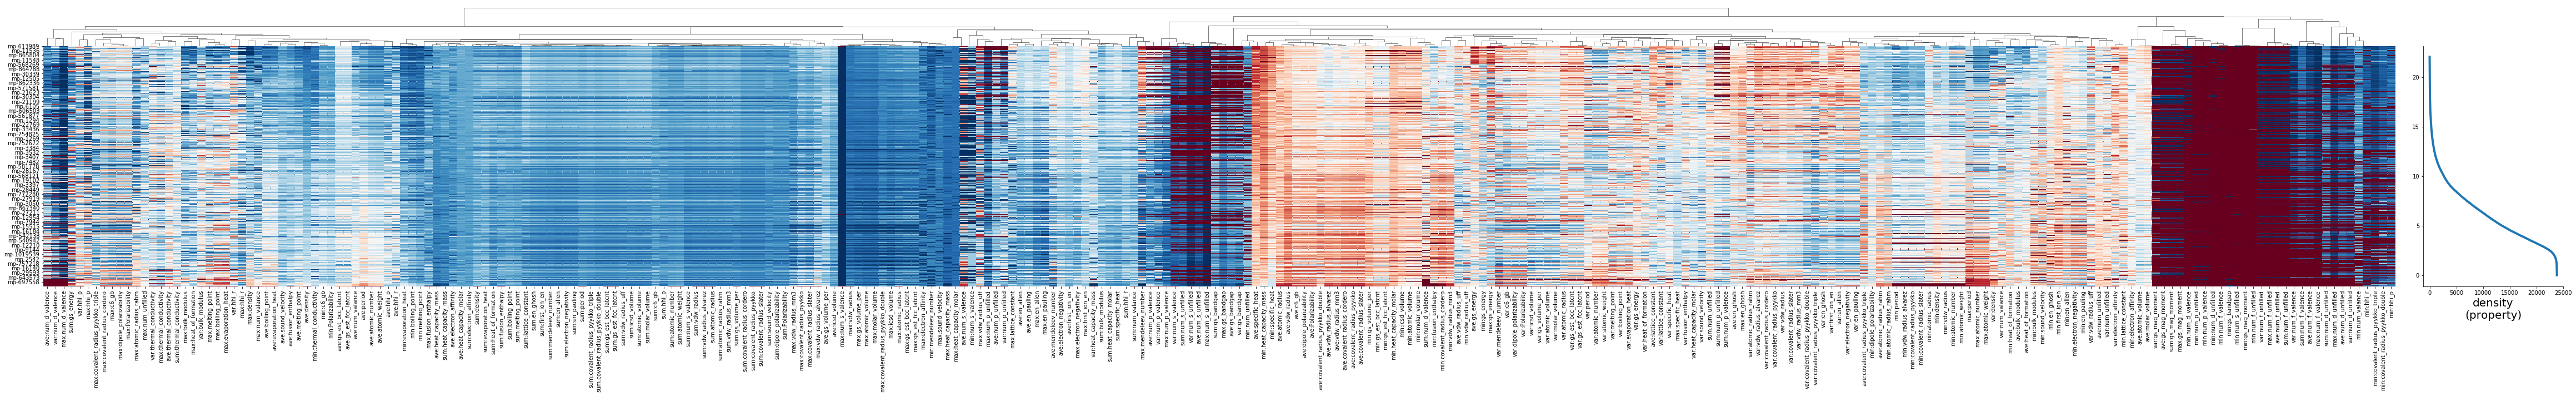

In [6]:
%matplotlib inline
from xenonpy.visualization import DescHeatmap

# select stable structure
props = props[props.e_above_hull == 0]
print(props.info())

dens = props[props['density'] != 0]
dens = dens.sort_values(by='density', ascending=False)
desc_dens = desc.loc[dens.index, :]
dens = dens['density']

# draw heatmap
dh_map = DescHeatmap(
    #     save=dict(fname='density_desc.png', dpi=150, bbox_inches='tight', transparent=False),
    method='complete',
    bc=True,  # box-cox transfer
    figsize=(70, 10))

dh_map.fit(desc_dens)
dh_map.draw(dens)

### calculate descriptors from structures

calculate rdf from structures

In [4]:
# load structures
structures = Loader().mp_structure
structures

In [ ]:
from xenonpy.descriptor import RDFDesc

# long time consuming
rdf = RDFDesc().fit_transform(structures)
rdf

converting 69640 structure
